# Big Data Content Analytics - AUEB

## Introduction to Feed Forward Networks 

* Lab Assistant: George Perakis
* Email: gperakis[at]aeub.gr 

### Importing Modules

In [1]:
# !pip install tensorflow

In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline

### Loading dataset

### At first download the file from this [link](https://drive.google.com/file/d/1yyOuPAvAzNV_oeh2QfHu9aqzCk50ypOM/view?usp=sharing)


In [3]:
# using pandas to read a .csv file
df = pd.read_csv('stixoi_info_lyrics_all.csv')

df.sample(5)

,composers,lyricists,lyrics,singers,title
13824,Νίκος Μαμαγκάκης,Αθηνά Καραταράκη,Μέσ’ στων ματιών σου τα νερά\r\nχωρίς βαρκούλα...,Λιζέττα Καλημέρη,Μέσ’ στων ματιών σου τα νερά
4769,NaN,NaN,Τίποτα δεν έμεινε\r\nτίποτα απ τα περασμένα\r\...,Βικτώρια Χαλκίτη,Τώρα - τώρα
20529,Δημήτρης Χαλκιάς,Βασίλης Παπαδόπουλος,Για όλους είσαι μονοπάτι \r\nπου βγάζει στην κ...,Κατερίνα Στανίση,Το μονοπάτι
38411,Γιώργος Κατσαρός (Θεολογίτης),Γιώργος Κατσαρός (Θεολογίτης),Στης Σύρας τον ανήφορο\r\nμου την εσκάσαν σήμε...,Γιώργος Κατσαρός (Θεολογίτης),Στης Σύρας τον ανήφορο
32774,Αργύρης Στασουλάκης,Φώτης Στασουλάκης,Πιο πολύ τρέχει το δάκρυ απ’ το ποτάμι\r\nπιο ...,Φώτης Στασουλάκης,Προσευχή


In [4]:
# converts NaN's to None 
df = df.where((pd.notnull(df)), None)

df.sample(5)

,composers,lyricists,lyrics,singers,title
44459,Αμελοποίητα,Γιώργος Σαραντάρης,Κορυδαλλοί κορυδαλλοί αδελφοί μου\r\nΖύγωσα πά...,None,Θαλασσινός βίος 12
23816,Γιώργος Γεωργόπουλος,Λάκης Τσώλης,Τι κρίμα να `σαι αλλουνού γυναίκα\r\nκι εγώ να...,Γιώργος Μπουλουγουράς,Διπλή αγάπη
39111,Λουκάς Θάνος,Πάνος Δημητρόπουλος,Στον κήπο μας \r\nθα παίζουν τα λιοντάρια με τ...,Σταύρος Σιόλας,Στον κήπο μας
29401,Αμελοποίητα,Κώστας Βάρναλης,"Το τελευταίο σου γραμματάκι, \r\nπου σπαρταράε...",None,Σ’ ένα αδειανό βάθρο Θεού 9
49460,Σώτης Βολάνης,Σώτης Βολάνης | Γιώργος Ασλάνης,Σ’ έχω ξεπεράσει τώρα πια\r\nέχω βρει μια άλλη...,Σώτης Βολάνης,Σ’ έχω ξεπεράσει


In [5]:
# some basic descriptions
df.describe().T

,count,unique,top,freq
composers,47432,3836,Αμελοποίητα,13708
lyricists,47902,5489,Παραδοσιακό,983
lyrics,50608,50477,Ο στιχουργός του συγκεκριμένου τραγουδιού έχει...,32
singers,35869,4610,Λευτέρης Πανταζής,361
title,50608,43518,Νανούρισμα,37


In [6]:
# and some extra info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50608 entries, 0 to 50607
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   composers  47432 non-null  object
 1   lyricists  47902 non-null  object
 2   lyrics     50608 non-null  object
 3   singers    35869 non-null  object
 4   title      50608 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [7]:
random_id = 8901

df.loc[random_id]['lyrics']

'Δεν μπορούσες λίγο χρόνο να δώσεις\r\nπερισσότερο δεν είχες καιρό\r\nδε μπορούσες ποτέ να με νιώσεις\r\nένα στήριγμα να `χω γερό\n\r\nΤώρα δεν μπορώ εγώ\r\nάλλαξε το σκηνικό\r\nτώρα είμαι\r\nσε περίεργη φάση\n\r\nΤώρα πια δε βλέπω φως\r\nμεταξύ μας δυστυχώς\r\nκαι δεν ξέρω \r\nπότε θα μου περάσει\n\r\nΔεν μπορούσες το θυμό σου να πνίξεις\r\nαντιδρούσες με το παραμικρό\r\nδε μπορούσες ενδιαφέρον να δείξεις\r\nγια ποιο λόγο εγώ να μπορώ'

In [8]:
print(df.loc[random_id]['lyrics'])

Δεν μπορούσες λίγο χρόνο να δώσεις
περισσότερο δεν είχες καιρό
δε μπορούσες ποτέ να με νιώσεις
ένα στήριγμα να `χω γερό

Τώρα δεν μπορώ εγώ
άλλαξε το σκηνικό
τώρα είμαι
σε περίεργη φάση

Τώρα πια δε βλέπω φως
μεταξύ μας δυστυχώς
και δεν ξέρω 
πότε θα μου περάσει

Δεν μπορούσες το θυμό σου να πνίξεις
αντιδρούσες με το παραμικρό
δε μπορούσες ενδιαφέρον να δείξεις
για ποιο λόγο εγώ να μπορώ


In [9]:
# Counting the frequency of each lyricist
lyricists_counts = Counter(df['lyricists'])

In [10]:
# alternatively use: df['lyricists'].value_counts()

In [11]:
lyricists_counts.most_common(25)

[(None, 2706),
 ('Παραδοσιακό', 983),
 ('Ανδρέας Κάλβος', 438),
 ('Ηλίας Φιλίππου', 397),
 ('Γιάννης Τσίγκρας', 333),
 ('Γιώργος Σαραντάρης', 302),
 ('Θεόδωρος Γκλαβέρης', 295),
 ('Πυθαγόρας', 286),
 ('Τάσος Λειβαδίτης', 282),
 ('Αχιλλέας Παράσχος', 271),
 ('Χλόη Κουτσουμπέλη', 269),
 ('Τάκης Μουσαφίρης', 264),
 ('Μίλτος Σαχτούρης', 261),
 ('Τόλης Νικηφόρου', 254),
 ('Κωνσταντίνος Καβάφης', 250),
 ('Κώστας Βάρναλης', 236),
 ('Κώστας Βίρβος', 225),
 ('Ιωάννης Καρασούτσας', 222),
 ('Γεώργιος Σουρής', 220),
 ('Τζούτζη Ματζουράνη', 207),
 ('Πάνος Φαλάρας', 206),
 ('Γιάννης Ρίτσος', 206),
 ('Νίκος Γρηγοριάδης', 200),
 ('Νίκος Καρβέλας', 197),
 ('Γιώργος Σεφέρης', 193)]

In [12]:
# Getting the counts of a specific Lyricist
lyricists_counts.get('Φοίβος')

109

In [13]:
# Extracting the top 20 Lyricists.
# We use 21 in the code because we will remove the "None" Lyricist
top_lyricists = lyricists_counts.most_common()[:21]
top_lyricists

[(None, 2706),
 ('Παραδοσιακό', 983),
 ('Ανδρέας Κάλβος', 438),
 ('Ηλίας Φιλίππου', 397),
 ('Γιάννης Τσίγκρας', 333),
 ('Γιώργος Σαραντάρης', 302),
 ('Θεόδωρος Γκλαβέρης', 295),
 ('Πυθαγόρας', 286),
 ('Τάσος Λειβαδίτης', 282),
 ('Αχιλλέας Παράσχος', 271),
 ('Χλόη Κουτσουμπέλη', 269),
 ('Τάκης Μουσαφίρης', 264),
 ('Μίλτος Σαχτούρης', 261),
 ('Τόλης Νικηφόρου', 254),
 ('Κωνσταντίνος Καβάφης', 250),
 ('Κώστας Βάρναλης', 236),
 ('Κώστας Βίρβος', 225),
 ('Ιωάννης Καρασούτσας', 222),
 ('Γεώργιος Σουρής', 220),
 ('Τζούτζη Ματζουράνη', 207),
 ('Πάνος Φαλάρας', 206)]

In [14]:
top_lyricists = list(filter(None, [lyricist for lyricist, count in top_lyricists]))
top_lyricists

['Παραδοσιακό',
 'Ανδρέας Κάλβος',
 'Ηλίας Φιλίππου',
 'Γιάννης Τσίγκρας',
 'Γιώργος Σαραντάρης',
 'Θεόδωρος Γκλαβέρης',
 'Πυθαγόρας',
 'Τάσος Λειβαδίτης',
 'Αχιλλέας Παράσχος',
 'Χλόη Κουτσουμπέλη',
 'Τάκης Μουσαφίρης',
 'Μίλτος Σαχτούρης',
 'Τόλης Νικηφόρου',
 'Κωνσταντίνος Καβάφης',
 'Κώστας Βάρναλης',
 'Κώστας Βίρβος',
 'Ιωάννης Καρασούτσας',
 'Γεώργιος Σουρής',
 'Τζούτζη Ματζουράνη',
 'Πάνος Φαλάρας']

In [15]:
# Keep only the songs that are in the given List of Lyricists.
df_top = df[df['lyricists'].isin(top_lyricists)].reset_index(drop=True)

df_top.sample(10)

,composers,lyricists,lyrics,singers,title
5037,Αμελοποίητα,Χλόη Κουτσουμπέλη,Κάθε ποίημα είναι ένας άντρας.\r\nΠλαγιάζεις μ...,None,Η μυστική Ζωή των ποιημάτων Χ
2176,Αμελοποίητα,Κώστας Βάρναλης,Απ’ το χωριό κατέβηκα\r\nμ’ όλη τη φαμελιά μου...,None,"Ο ""καλός"" Λαός"
5603,Αμελοποίητα,Γιάννης Τσίγκρας,"Διάβαζα λυτά έγγραφα του Δήμου, γραμμένα στην ...",None,Πώς γράφεται ένα ιστορικό βιβλίο
5123,Αμελοποίητα,Γεώργιος Σουρής,"Λοιπὸν στὴν Ἄρτα πόλεμος ἐκ τῶν λυσσωδεστέρων,...",None,Θούριον
4053,Αμελοποίητα,Αχιλλέας Παράσχος,Ἄκοντες δύσμοιροι φονεῖς καὶ ἴσως πλήρεις τρόμ...,None,Εν περιπάτω 13
5312,Αμελοποίητα,Γιώργος Σαραντάρης,Μια σιωπή βρεγμένη με λόγια\r\nΟι δυο μας εκεί...,None,Μια σιωπή βρεγμένη με λόγια
1867,Νεκτάριος Μπήτρος | Λευτέρης Πανταζής,Ηλίας Φιλίππου,Να θυμάσαι τι σου λέω πάντα θα `μαι εδώ\r\nνα ...,Λευτέρης Πανταζής,Να θυμάσαι
135,Θόδωρος Δερβενιώτης,Κώστας Βίρβος,Σε πλήγωσε η ντόλτσε βίτα\r\nκι είναι το δάκρυ...,Στράτος Διονυσίου,Η νέα ντόλτσε βίτα
4079,Αμελοποίητα,Αχιλλέας Παράσχος,"Ποῦ εἶσθε πατριαρχικοὶ καιροί, γαληνιαῖοι, \r\...",None,Εν περιπάτω 19
3895,Αμελοποίητα,Αχιλλέας Παράσχος,Θνητοὺς νὰ δῆτε τοὺς Θεοὺς στοὺς κάμπους τοῦ ἀ...,None,Εις τον Θεόν 25


### Extract - Transform data


#### The concept is that given a song's lyrics we will try to infer the Lyricist that wrote it

In [16]:
# The raw input (lyrics)
X = df_top['lyrics']

X.head(10)

0    Θά `μαι παρών όσο θα ζεις και θα υπάρχεις\r\nΜ...
1    Το σπίτι αγάπη μύρισε\r\nΚι η καμαρούλα μας στ...
2    Μη μου λες όπως χτες, \r\nοι νύχτες κρύβουν εν...
3    Κακή ψυχή εγώ δεν έχω\r\nκαι όλα σου τα συγχωρ...
4    Χτυπάτε τις καμπάνες, χτυπάτε τις καμπάνες, \r...
5    Το τελευταίο μας φιλί, το υστερνό μας χάδι, \r...
6    Σκοτεινιασμένε ουρανέ χαμήλωσε λιγάκι\r\nκαι π...
7    Πες μου τι ζήλεψες απ’ την καρδιά μου\r\nκι απ...
8    Έκλαψες πολλές φορές\r\nΜαρινέλλα μου για μένα...
9    Χίλιοι γιατροί με κοίταξαν, αχ!\r\nσ’ Ανατολή ...
Name: lyrics, dtype: object

In [17]:
# The raw output (lyricists)
y = df_top['lyricists']

y.head(10)

0        Πυθαγόρας
1        Πυθαγόρας
2    Πάνος Φαλάρας
3    Κώστας Βίρβος
4    Κώστας Βίρβος
5    Κώστας Βίρβος
6    Κώστας Βίρβος
7    Κώστας Βίρβος
8    Κώστας Βίρβος
9    Κώστας Βίρβος
Name: lyricists, dtype: object

### Splitting Dataset Procedure

---
**NOTE:**

Usually we split the data in **3 smaller datasets**
* Training dataset
* Validation dataset
* Test dataset (unseen dataset)

---



In [18]:
from sklearn.preprocessing import OneHotEncoder

# splitting in train-validation-test sets in a stratified manner.
from sklearn.model_selection import train_test_split

# you may also use
# from sklearn.model_selection import StratifiedShuffleSplit

More info on [stratified splitting](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)

At first, we will split the Original dataset into two parts:
* Train-Validation dataset
* Test dataset 

Secondly, we will split the Train-Validation dataset into another two parts:
* Train dataset
* Validation dataset

In [19]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                            y,
                                                            test_size=0.15,
                                                            random_state=42,
                                                            stratify=y)

In [20]:
# check here the indexes. 
X_train_val.head()

6049    Γιατὶ ἀλήθεια πάντα καθένας νὰ γυρεύῃ\r\nἐκεῖν...
4485    Σκιά μου έχεις γίνει \r\nδεν ξέρω τι να κάνω,\...
2880    Σήμερα ας πούμε πως είμαι στη Νέα Ορλεάνη, δεν...
536     Τα μάτια σου μ`αρέσουνε σαν είν`και δακρυσμένα...
2719    «Είν’ όλα νέα σήμερον έτος δωρήματα ελπίδες κα...
Name: lyrics, dtype: object

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.20, 
                                                  random_state=42,
                                                  stratify=y_train_val)

In [22]:
print(f'X_train_val shape: {X_train_val.shape}')
print(f'y_train_val shape: {y_train_val.shape}')
print()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print()

print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

print()
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train_val shape: (5270,)
y_train_val shape: (5270,)

X_train shape: (4216,)
y_train shape: (4216,)

X_val shape: (1054,)
y_val shape: (1054,)

X_test shape: (931,)
y_test shape: (931,)


### Label Encoding 

In [23]:
# Encoding the labels using a One-Hot Encoder
y_enc = OneHotEncoder(sparse=False)

In [24]:
y_enc

OneHotEncoder(sparse=False)

Note: One hot encoding also explained [here](https://medium.com/hackernoon/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

In [25]:
# the following fit_transform will cause a ValueError, because it takes as input
# only one column

# ValueError: Expected 2D array, got 1D array instead:
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature
# or array.reshape(1, -1) if it contains a single sample.

y_enc.fit_transform(y_train.values)

ValueError: Expected 2D array, got 1D array instead:
array=['Ανδρέας Κάλβος' 'Γιώργος Σαραντάρης' 'Πάνος Φαλάρας' ... 'Παραδοσιακό'
 'Παραδοσιακό' 'Ηλίας Φιλίππου'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
# At first we run fit_transform on the Training data
y_train_enc = y_enc.fit_transform(y_train.values.reshape(-1, 1))
y_train_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# Then we use the fitted One-hot-Encoder to transform the rest of the data
y_val_enc = y_enc.transform(y_val.values.reshape(-1, 1))

y_test_enc = y_enc.transform(y_test.values.reshape(-1, 1))

In [28]:
print(f'y_train shape: {y_train_enc.shape}')
print(f'y_val shape: {y_val_enc.shape}')
print(f'y_test shape: {y_test_enc.shape}')

y_train shape: (4216, 20)
y_val shape: (1054, 20)
y_test shape: (931, 20)


In [29]:
# The categories that we obtained by the Encoder
y_enc.categories_

[array(['Ανδρέας Κάλβος', 'Αχιλλέας Παράσχος', 'Γεώργιος Σουρής',
        'Γιάννης Τσίγκρας', 'Γιώργος Σαραντάρης', 'Ηλίας Φιλίππου',
        'Θεόδωρος Γκλαβέρης', 'Ιωάννης Καρασούτσας',
        'Κωνσταντίνος Καβάφης', 'Κώστας Βάρναλης', 'Κώστας Βίρβος',
        'Μίλτος Σαχτούρης', 'Πάνος Φαλάρας', 'Παραδοσιακό', 'Πυθαγόρας',
        'Τάκης Μουσαφίρης', 'Τάσος Λειβαδίτης', 'Τζούτζη Ματζουράνη',
        'Τόλης Νικηφόρου', 'Χλόη Κουτσουμπέλη'], dtype=object)]

In [30]:
# What the aforementioned code did:
temp = pd.DataFrame(y_train_enc)
temp.columns = list(y_enc.categories_[0])
temp.head(10)

,Ανδρέας Κάλβος,Αχιλλέας Παράσχος,Γεώργιος Σουρής,Γιάννης Τσίγκρας,Γιώργος Σαραντάρης,Ηλίας Φιλίππου,Θεόδωρος Γκλαβέρης,Ιωάννης Καρασούτσας,Κωνσταντίνος Καβάφης,Κώστας Βάρναλης,Κώστας Βίρβος,Μίλτος Σαχτούρης,Πάνος Φαλάρας,Παραδοσιακό,Πυθαγόρας,Τάκης Μουσαφίρης,Τάσος Λειβαδίτης,Τζούτζη Ματζουράνη,Τόλης Νικηφόρου,Χλόη Κουτσουμπέλη
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
def highlight_ones(s):
    '''
    highlight the number 1 in a Series yellow.
    '''
    is_max = s == 1
    return ['background-color: yellow' if v else '' for v in is_max]

In [32]:
temp.head(10).style.apply(highlight_ones)

,Ανδρέας Κάλβος,Αχιλλέας Παράσχος,Γεώργιος Σουρής,Γιάννης Τσίγκρας,Γιώργος Σαραντάρης,Ηλίας Φιλίππου,Θεόδωρος Γκλαβέρης,Ιωάννης Καρασούτσας,Κωνσταντίνος Καβάφης,Κώστας Βάρναλης,Κώστας Βίρβος,Μίλτος Σαχτούρης,Πάνος Φαλάρας,Παραδοσιακό,Πυθαγόρας,Τάκης Μουσαφίρης,Τάσος Λειβαδίτης,Τζούτζη Ματζουράνη,Τόλης Νικηφόρου,Χλόη Κουτσουμπέλη
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
temp.sum(axis=0).head(10)

Ανδρέας Κάλβος          298.0
Αχιλλέας Παράσχος       184.0
Γεώργιος Σουρής         149.0
Γιάννης Τσίγκρας        226.0
Γιώργος Σαραντάρης      206.0
Ηλίας Φιλίππου          270.0
Θεόδωρος Γκλαβέρης      201.0
Ιωάννης Καρασούτσας     151.0
Κωνσταντίνος Καβάφης    170.0
Κώστας Βάρναλης         161.0
dtype: float64

In [34]:
temp.sum(axis=1).sample(10)

2819    1.0
3499    1.0
1722    1.0
734     1.0
1840    1.0
2335    1.0
2615    1.0
1181    1.0
3367    1.0
622     1.0
dtype: float64

In [35]:
# deleting the variable (just for demonstration purposes)
del temp

## Handling Text

### Bag of Words Approach (BoW)

More info [here](https://en.wikipedia.org/wiki/Bag-of-words_model)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [37]:
### Bag of Words (BoW) Approach

sample_sentences = [
    'This is a sentence this',
    'This is a larger sentence',
    'Another sentence with words'
]
sample_sentences

['This is a sentence this',
 'This is a larger sentence',
 'Another sentence with words']

In [38]:
sample_vect = CountVectorizer()

sample_vect.fit(sample_sentences)

CountVectorizer()

In [39]:
sample_sents_bow = sample_vect.transform(sample_sentences)
# creates a sparse matrix
sample_sents_bow

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [40]:
sample_sents_bow.toarray()

array([[0, 1, 0, 1, 2, 0, 0],
       [0, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [41]:
sample_vect.vocabulary_

{'this': 4,
 'is': 1,
 'sentence': 3,
 'larger': 2,
 'another': 0,
 'with': 5,
 'words': 6}

#### Converting the sparse matrix into dense and visualize the BoW approach

In [42]:
bow_df = pd.DataFrame(sample_sents_bow.todense())
bow_df.columns = sorted(sample_vect.vocabulary_)
bow_df['Original Sentence'] = sample_sentences
bow_df.style.apply(highlight_ones)

,another,is,larger,sentence,this,with,words,Original Sentence
0,0,1,0,1,2,0,0,This is a sentence this
1,0,1,1,1,1,0,0,This is a larger sentence
2,1,0,0,1,0,1,1,Another sentence with words


In [43]:
# Performing some very basic tokenization to extract STOPWORDS

In [44]:
# converting all lyrics to lowercase and replacing the "." with " "
lyrics = df['lyrics'].str.lower().str.replace('.', ' ', regex=False)
lyrics.head()

0    ήρθε πάλι στον περαία, \r\nτο γρι γρι με την π...
1    θά `μαι παρών όσο θα ζεις και θα υπάρχεις\r\nμ...
2    το σπίτι αγάπη μύρισε\r\nκι η καμαρούλα μας στ...
3    μες στο τρόλεϊ που μπήκα\r\nμπήκε και μια πιτσ...
4    πού ’ν’ αυτά τα σπίτια, \r\nπου ’χαν τις αυλές...
Name: lyrics, dtype: object

In [45]:
# A pandas Series is also an iterable. So we can handle it like a List.
# Concatenating all songs into one text.
corpora = " ".join(lyrics)

print(corpora[:1000])

ήρθε πάλι στον περαία, 
το γρι γρι με την παρέα
φορτωμένο φρέσκα ψάρια
μουγκριά και καλαμάρια 

το `χουν το γρι γρι ψαράδες
παλληκάρια χουβαρντάδες
μόλις ξεπουλάνε πάνε
στην ταβέρνα και γλεντάνε 

πίνουν όμορφα χορεύουν
κι από τα βιολιά γυρεύουν
να χορέψουν τσιφτετέλι
αμάν, αμάν, αμάν, γιαλελέλι 

αχ, γιάλα!
γιαλελέλι, μ’ γιάλα! θά `μαι παρών όσο θα ζεις και θα υπάρχεις
μεσ’το μυαλό και στην καρδιά σου εμένα θάχεις
κι’όσο θα φεύγεις μακριά απ ’το παρελθόν
θά `μαι παρών

δεν είμαι γράμμα να με σκίσεις
δεν είμαι πόρτα να με κλείσεις
δεν είμαι ρούχο να μ’αλλάξεις
δεν είμαι δρόμος που σε άλλον πια θα πας
εγώ είμαι αυτός που αγαπάς

θά `μαι παρών και στη ζωή και στα όνειρα σου
θά `μαι μια πίκρα στα καινούρια τα φιλιά σου
κάνε το βήμα σου και θα το δεις λοιπόν
θά `μαι παρών το σπίτι αγάπη μύρισε
κι η καμαρούλα μας στοργή
ο χρόνος πίσω γύρισε
απόψε θά `μαστε μαζί

για να πατήσεις τα σκαλιά μου
δάκρυ τα πέρασα κι’ασβέστη
κεράκια καιν τα δάχτυλα μου
η καρδιά μου 


#### We will now split the unified text into tokens, in order to count them and find the most frequent.
#### Usually the most frequent tokens in a text are Stop Words

In [46]:
top_words = Counter(corpora.split()).most_common()
top_words[:20]

[('να', 175510),
 ('και', 170696),
 ('το', 132346),
 ('μου', 128088),
 ('τα', 94802),
 ('κι', 92970),
 ('με', 92667),
 ('που', 82785),
 ('σου', 80282),
 ('θα', 77094),
 ('η', 68229),
 ('σε', 58753),
 ('δεν', 58387),
 ('την', 53585),
 ('για', 51652),
 ('στο', 44060),
 ('του', 43302),
 ('ο', 39447),
 ('τη', 37277),
 ('μια', 35935)]

In [47]:
# Printing the top 100 most common words in order to pick those that we want to 
# include in our Stop Words List. 
print(sorted([i[0].lower() for i in top_words[:100]]))

['ένα', 'έτσι', 'έχει', 'έχεις', 'έχω', 'ήταν', 'αγάπη', 'αγαπώ', 'ακόμα', 'αν', 'από', 'απ’', 'ας', 'αυτή', 'αυτό', 'για', 'γιατί', 'δε', 'δεν', 'δυο', 'είμαι', 'είναι', 'είσαι', 'εγώ', 'εδώ', 'εσύ', 'ζωή', 'η', 'θέλω', 'θα', 'κάθε', 'κάτι', 'και', 'καρδιά', 'καὶ', 'κι', 'λες', 'μάτια', 'μέρα', 'μέσα', 'μα', 'μαζί', 'μας', 'με', 'μες', 'μη', 'μην', 'μια', 'μου', 'μου,', 'μόνο', 'μ’', 'να', 'νύχτα', 'ν’', 'ο', 'οι', 'ούτε', 'πάλι', 'πάντα', 'πες', 'πια', 'πιο', 'ποτέ', 'που', 'πως', 'πώς', 'σένα', 'σαν', 'σε', 'σου', 'σου,', 'στα', 'στη', 'στην', 'στις', 'στο', 'στον', 'σ’', 'τα', 'τη', 'την', 'της', 'τι', 'τις', 'το', 'τον', 'του', 'τους', 'των', 'τώρα', 'τ’', 'φως', 'χωρίς', 'ψυχή', 'όλα', 'όμως', 'όπως', 'όταν', 'ότι']


In [48]:
# Creating our custom Greek Stop Words List.
el_stop = [
    'αν', 'απ', 'απο', 'ας', 'για', 'γιατι', 'δε', 'δεν', 'εγω', 'ειναι', 'ενα',
    'εσυ', 'ετσι', 'εχει', 'η', 'η', 'ηταν', 'θα', 'και', 'και', 'κι', 'μα', 'μας',
    'με', 'μες', 'μη', 'μην', 'μια', 'μου', 'μου', 'μου,', 'μ’', 'ν', 'να', 'ο',
    'οι', 'ομως', 'οπως', 'οταν', 'οτι', 'πια', 'πιο', 'που', 'πως', 'πως', 'σ',
    'σαν', 'σε', 'σου', 'σου', 'σου', 'στα', 'στη', 'στην', 'στις', 'στο', 'στον',
    'τ', 'τα', 'τη', 'την', 'της', 'τι', 'τις', 'το', 'τον', 'του', 'τους', 'των'
]

In [49]:
# Now that we know how to use the CountVectorizer, we will apply the same
# transformation to the Lyrics.

In [50]:
# Total Number of Words to use for vectorization. 
# The vectorizer will keep the K most common tokens (words-characters)
max_words = 3000

In [51]:
# This vectorizer will give the number of appearances of each word
counter_vectorizer = CountVectorizer(
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words=el_stop,
    ngram_range=(1, 1), # unigrams
    max_features=max_words,
    binary=False # binary output or full counts. 
)
counter_vectorizer

CountVectorizer(max_features=3000,
                stop_words=['αν', 'απ', 'απο', 'ας', 'για', 'γιατι', 'δε',
                            'δεν', 'εγω', 'ειναι', 'ενα', 'εσυ', 'ετσι', 'εχει',
                            'η', 'η', 'ηταν', 'θα', 'και', 'και', 'κι', 'μα',
                            'μας', 'με', 'μες', 'μη', 'μην', 'μια', 'μου',
                            'μου', ...],
                strip_accents='unicode')

In [52]:
# This vectorizer will give return 0 or 1 based on the appearence of each word
binary_vectorizer = CountVectorizer(
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words=el_stop,
    ngram_range=(1, 1), # unigrams
    max_features=max_words,
    binary=True # binary output or full counts. 
    )
binary_vectorizer

CountVectorizer(binary=True, max_features=3000,
                stop_words=['αν', 'απ', 'απο', 'ας', 'για', 'γιατι', 'δε',
                            'δεν', 'εγω', 'ειναι', 'ενα', 'εσυ', 'ετσι', 'εχει',
                            'η', 'η', 'ηταν', 'θα', 'και', 'και', 'κι', 'μα',
                            'μας', 'με', 'μες', 'μη', 'μην', 'μια', 'μου',
                            'μου', ...],
                strip_accents='unicode')

In [53]:
X_train

2333    Τι εἶπον!.. διασκορπίσατε\r\nἄνεμοι τοὺς δυσφή...
4577    Η γυναίκα σαν όνειρο από σάρκα\r\nθλίβει την π...
1896    Ποτέ σου μέχρι τώρα ίσως δεν το σκέφτηκες\r\nτ...
5543    Γνωρίζει πια πως\r\nδεν είναι οι ανόητες Σειρή...
5936    Μόνο το τέλος \r\nδεν τελειώνει ποτέ.\r\nΚι’ α...
                              ...                        
451     Μιλάς και εσύ πως κουράστηκες πια\r\nΚαι θέλει...
603     Λες πως δε σου λείπω ούτε μια νύχτα\r\nσαν να ...
1176    Περιβόλι μ’ οργωμένο, μαργαριταροσπαρμένο.\r\n...
1177    Μες στης νύχτας τη σιγαλιά\r\nθα βγω με μαντολ...
1742    Ένα ποτήρι αδειανό \r\nστο ίδιο το τραπέζι\r\n...
Name: lyrics, Length: 4216, dtype: object

Fitting the CountVectorizer **ONLY ON THE TRAINING DATASET**

In [54]:
# fitting the CountVectorizer in the training data
X_train_enc = counter_vectorizer.fit_transform(X_train)

In [55]:
X_train_enc.shape

(4216, 3000)

In [56]:
# Using the FITTED CountVectorizer we transform the Validation and Test Sets
X_val_enc = counter_vectorizer.transform(X_val)
X_test_enc = counter_vectorizer.transform(X_test)

In [57]:
print(f'X_train encoded shape: {X_train_enc.shape}')
print(f'X_val encoded shape: {X_val_enc.shape}')
print(f'X_test encoded shape: {X_test_enc.shape}')

X_train encoded shape: (4216, 3000)
X_val encoded shape: (1054, 3000)
X_test encoded shape: (931, 3000)


In [58]:
X_train_enc

<4216x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 109561 stored elements in Compressed Sparse Row format>

In [59]:
X_train_enc[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Extract-Transform-Load (ETL) Recap

#### Objective: Based on the Lyrics of a song we try to infer it's Lyricist

##### Pipeline
* Load dataset
* Extract top lyricists
* Filter dataset to contain only the lyricists that we want use
* Split the *raw* dataset into **X (lyrics)** and **y (lyricists)**
* Split **X** and **y** into **Train | Validation | Test** sets using **stratification** 
* Extract/Create **Greek Stop Words** list
* Create a **CountVectorizer** Object
* Fit the CountVectorizer on the **Train** Dataset
* Transform **Train, Validation and Test** sets to Bag of Words vectors
* Tranform the **y labels (lyricists) into One-Hot Matrix**

### Model Build and Fit

In [60]:
# Model Imports

In [61]:
# !pip install pydot
# !pip install graphviz
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
import pydot

In [62]:
y_enc.categories_

[array(['Ανδρέας Κάλβος', 'Αχιλλέας Παράσχος', 'Γεώργιος Σουρής',
        'Γιάννης Τσίγκρας', 'Γιώργος Σαραντάρης', 'Ηλίας Φιλίππου',
        'Θεόδωρος Γκλαβέρης', 'Ιωάννης Καρασούτσας',
        'Κωνσταντίνος Καβάφης', 'Κώστας Βάρναλης', 'Κώστας Βίρβος',
        'Μίλτος Σαχτούρης', 'Πάνος Φαλάρας', 'Παραδοσιακό', 'Πυθαγόρας',
        'Τάκης Μουσαφίρης', 'Τάσος Λειβαδίτης', 'Τζούτζη Ματζουράνη',
        'Τόλης Νικηφόρου', 'Χλόη Κουτσουμπέλη'], dtype=object)]

In [63]:
# Some parameters that we will use:

# Number of Classes for the Y labels (number of lyricists)
nb_classes = len(y_enc.categories_[0])

print('Number of Classes (lyricists): {}'.format(nb_classes))

# Number of Epochs that we will train our Feed Forward Network
nb_epoch = 30

# The batch_size of the data that  will be fed to the Model when training
batch_size = 32 

# Dropout Rate of the Dropout Layer (how many neurons to shutdown each time)
dropout_rate = 0.4

Number of Classes (lyricists): 20


##### Model Setup

In [64]:
print('Building model...', end='\n\n')

# The model that we will create is a sequential model meaning that
# each layer that we add per line will use as input the output of the 
# former layer added to the model

# define an empty sequential structure 
model = Sequential()

# add a dense layer (MLP)
model.add(Dense(512, input_shape=(max_words,)))

# use a relu activation on MLP's outputs
model.add(Activation('relu'))

# use a dropout layer with with 40% of inputs dropped
model.add(Dropout(dropout_rate))

# add a dense layer (MLP)
model.add(Dense(512))

# use a relu activation on MLP's outputs
model.add(Activation('relu'))

# use a dropout layer with with 20% of inputs droped
model.add(Dropout(dropout_rate))

# add a dense layer (MLP) 
model.add(Dense(nb_classes))

# use a softmax activation on 2nd MLP's outputs
model.add(Activation('softmax'))

# we have defined the structure of the model

# print model layers' info
print(model.summary())

Building model...

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1536512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2

In [65]:
# # pip install pydot
# # 
# plot_model(model,
#            to_file='model_plot.png',
#            show_shapes=True,
#            show_layer_names=True)

#### Compiling the model

In [66]:
# We compile the model using categorical crossentropy as a loss function 
# The reason is that we want to predict the lyricist among many lyricists

# and Adam as an optimizer (is more robust thatn Gradient Descent Optimizer)
# As a metric we can use "accuracy"
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
# we have compiled a model and it is ready to be trained

In [67]:
print('Ideally we want to find the Global Minimum of a surface like the following')
Image(url='https://blog.algorithmia.com/wp-content/uploads/2018/04/word-image-4.png')

Ideally we want to find the Global Minimum of a surface like the following


In [68]:
X_train_enc

<4216x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 109561 stored elements in Compressed Sparse Row format>

### Fitting (training) our Feed Forward Network Model

In [69]:
# We train (fit our data to) our model
history = model.fit(
    x=X_train_enc.todense(),           # features (as dense inputs)
    y=y_train_enc,           # labels
    batch_size=batch_size,   # define batch size
    epochs=nb_epoch,         # number of epochs
    verbose=2,               # the most extended verbosity level
    validation_data=(       
    X_val_enc.todense(),               # the validation split that we did before
    y_val_enc)
)

Epoch 1/30
132/132 - 2s - loss: 2.2808 - accuracy: 0.3309 - val_loss: 1.4667 - val_accuracy: 0.6091
Epoch 2/30
132/132 - 1s - loss: 0.8985 - accuracy: 0.7533 - val_loss: 1.0189 - val_accuracy: 0.7040
Epoch 3/30
132/132 - 1s - loss: 0.3150 - accuracy: 0.9213 - val_loss: 1.0251 - val_accuracy: 0.7201
Epoch 4/30
132/132 - 1s - loss: 0.1323 - accuracy: 0.9701 - val_loss: 1.0888 - val_accuracy: 0.7182
Epoch 5/30
132/132 - 1s - loss: 0.0694 - accuracy: 0.9874 - val_loss: 1.1938 - val_accuracy: 0.7021
Epoch 6/30
132/132 - 1s - loss: 0.0460 - accuracy: 0.9896 - val_loss: 1.2217 - val_accuracy: 0.7144
Epoch 7/30
132/132 - 0s - loss: 0.0368 - accuracy: 0.9924 - val_loss: 1.4219 - val_accuracy: 0.6793
Epoch 8/30
132/132 - 1s - loss: 0.0265 - accuracy: 0.9948 - val_loss: 1.3944 - val_accuracy: 0.6945
Epoch 9/30
132/132 - 1s - loss: 0.0174 - accuracy: 0.9964 - val_loss: 1.4399 - val_accuracy: 0.7002
Epoch 10/30
132/132 - 1s - loss: 0.0197 - accuracy: 0.9950 - val_loss: 1.4981 - val_accuracy: 0.6945

In [70]:
def plot_keras_history(history):
    """
    
    :param history: 
    :return: 
    """
    # the history object gives the metrics keys. 
    # we will store the metrics keys that are from the training sesion.
    metrics_names = [key for key in history.history.keys() if not key.startswith('val_')]

    for i, metric in enumerate(metrics_names):
        
        # getting the training values
        metric_train_values = history.history.get(metric, [])
        
        # getting the validation values
        metric_val_values = history.history.get("val_{}".format(metric), [])

        # As loss always exists as a metric we use it to find the 
        epochs = range(1, len(metric_train_values) + 1)
        
        # leaving extra spaces to allign with the validation text
        training_text = "   Training {}: {:.5f}".format(metric,
                                                        metric_train_values[-1])

        # metric
        plt.figure(i, figsize=(12, 6))

        plt.plot(epochs,
                 metric_train_values,
                 'b',
                 label=training_text)
        
        # if we validation metric exists, then plot that as well
        if metric_val_values:
            validation_text = "Validation {}: {:.5f}".format(metric,
                                                             metric_val_values[-1])

            plt.plot(epochs,
                     metric_val_values,
                     'g',
                     label=validation_text)
        
        # add title, xlabel, ylabe, and legend
        plt.title('Model Metric: {}'.format(metric))
        plt.xlabel('Epochs')
        plt.ylabel(metric.title())
        plt.legend()

    plt.show()

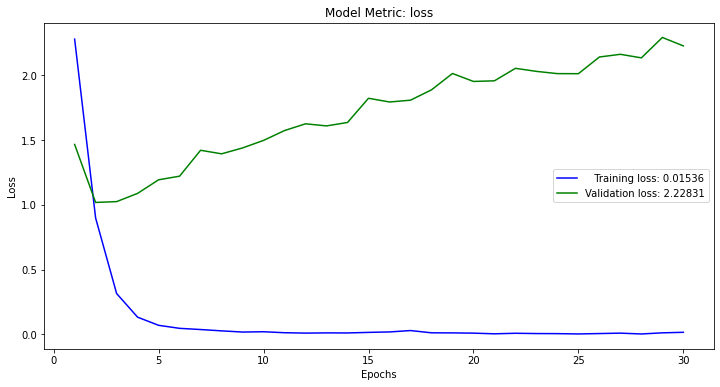

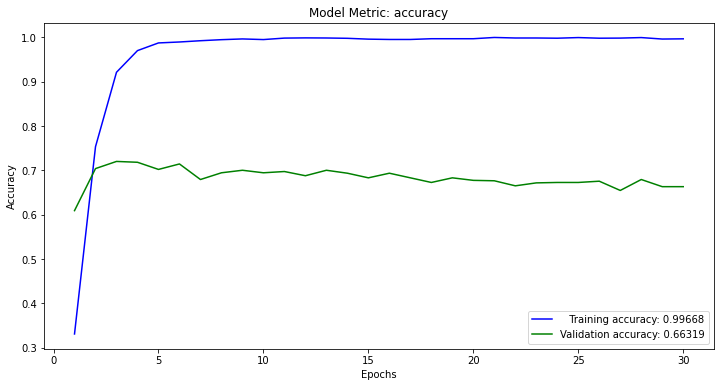

In [71]:
plot_keras_history(history)

### Model Evaluation

In [72]:
# evaluate and store on score variable on the TEST DATASET
score = model.evaluate(
    X_test_enc.todense(),    # features
    y_test_enc,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)

30/30 - 0s - loss: 2.0993 - accuracy: 0.6799


In [73]:
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))


Test categorical_crossentropy: 2.0992817878723145

Test accuracy: 67.991 %


### Model Prediction 

In [74]:
# Use to yield probability distribution over the categories
y_test_pred_probs = model.predict(X_test_enc)
y_test_pred_probs

array([[8.7447888e-01, 2.5995660e-06, 1.5547872e-08, ..., 1.9239887e-09,
        2.5203304e-08, 6.6958407e-08],
       [1.2149444e-06, 1.4337246e-07, 2.6198748e-07, ..., 3.8303202e-05,
        5.5055605e-04, 4.8907916e-04],
       [2.0482362e-32, 4.7741699e-13, 3.6400096e-19, ..., 1.9454197e-15,
        3.8612662e-13, 1.1237385e-15],
       ...,
       [2.5444720e-07, 7.1082003e-12, 1.4268355e-10, ..., 8.4291185e-11,
        1.7390081e-12, 1.5576786e-11],
       [2.4511980e-19, 8.6504477e-11, 2.1050038e-11, ..., 9.9518168e-08,
        1.7635439e-10, 4.0671069e-12],
       [1.6343693e-19, 5.8130980e-03, 2.3346550e-03, ..., 6.0000217e-05,
        2.3210439e-04, 3.8556234e-09]], dtype=float32)

In [75]:
y_test_pred_probs.shape

(931, 20)

In [76]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds = np.argmax(model.predict(X_test_enc), axis=-1)

y_test_preds[:50]

array([ 0,  4,  6, 18, 13, 13, 13, 13, 14,  5, 13, 12, 16, 10,  0,  9, 17,
       17, 19, 18,  2,  2,  9,  5,  4, 11,  5,  3,  1, 17, 13,  5, 16,  1,
       19,  6, 17,  3, 12, 10, 15, 17, 13, 16, 12,  3, 15,  0, 11,  3],
      dtype=int64)

In [77]:
# custom prediction function 
def get_one_hot_predictions(pred_probs):
    """
    """
    max_probs = np.max(pred_probs, axis=1)
    
    # reshaping to (len_of_predicts, 1)
    max_probs = max_probs.reshape(max_probs.shape[0], 1)

    return np.equal(pred_probs, max_probs).astype(float)

In [78]:
y_test_pred = get_one_hot_predictions(y_test_pred_probs)
y_test_pred

# check that each line has only one 1. 
# y_test_pred.sum(axis=1)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
# Now, we will use the fitted One Hot Encoder to Inverse Tranform the ouput
y_test_pred_lyricists = y_enc.inverse_transform(y_test_pred).flatten()
y_test_pred_lyricists[:20]

array(['Ανδρέας Κάλβος', 'Γιώργος Σαραντάρης', 'Θεόδωρος Γκλαβέρης',
       'Τόλης Νικηφόρου', 'Παραδοσιακό', 'Παραδοσιακό', 'Παραδοσιακό',
       'Παραδοσιακό', 'Πυθαγόρας', 'Ηλίας Φιλίππου', 'Παραδοσιακό',
       'Πάνος Φαλάρας', 'Τάσος Λειβαδίτης', 'Κώστας Βίρβος',
       'Ανδρέας Κάλβος', 'Κώστας Βάρναλης', 'Τζούτζη Ματζουράνη',
       'Τζούτζη Ματζουράνη', 'Χλόη Κουτσουμπέλη', 'Τόλης Νικηφόρου'],
      dtype=object)

In [80]:
# More Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
conf_mat = confusion_matrix(y_true=y_test,
                            y_pred=y_test_pred_lyricists)
conf_mat

array([[ 61,   0,   0,   0,   1,   0,   0,   4,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  3,  30,   0,   0,   1,   0,   0,   3,   2,   1,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0],
       [  2,   0,  23,   0,   1,   0,   0,   1,   3,   1,   0,   0,   0,
          1,   0,   0,   1,   0,   0,   0],
       [  1,   0,   0,  37,   2,   0,   0,   0,   0,   1,   0,   2,   0,
          0,   0,   0,   2,   1,   2,   2],
       [  1,   0,   1,   1,  31,   0,   0,   0,   0,   1,   1,   0,   0,
          1,   0,   1,   4,   2,   1,   0],
       [  0,   0,   0,   1,   0,  42,   0,   0,   0,   0,   0,   0,   8,
          1,   4,   2,   1,   1,   0,   0],
       [  0,   0,   0,   1,   1,   0,  41,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0],
       [  8,   0,   2,   0,   0,   0,   0,  23,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   1,   0,   0,   0,   0,   4,  30,   0,   0,  

In [82]:
# a bit prettier
pd.DataFrame(conf_mat,
             columns = y_enc.categories_,
             index=y_enc.categories_)

,Ανδρέας Κάλβος,Αχιλλέας Παράσχος,Γεώργιος Σουρής,Γιάννης Τσίγκρας,Γιώργος Σαραντάρης,Ηλίας Φιλίππου,Θεόδωρος Γκλαβέρης,Ιωάννης Καρασούτσας,Κωνσταντίνος Καβάφης,Κώστας Βάρναλης,Κώστας Βίρβος,Μίλτος Σαχτούρης,Πάνος Φαλάρας,Παραδοσιακό,Πυθαγόρας,Τάκης Μουσαφίρης,Τάσος Λειβαδίτης,Τζούτζη Ματζουράνη,Τόλης Νικηφόρου,Χλόη Κουτσουμπέλη
Ανδρέας Κάλβος,61,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
Αχιλλέας Παράσχος,3,30,0,0,1,0,0,3,2,1,0,0,0,1,0,0,0,0,0,0
Γεώργιος Σουρής,2,0,23,0,1,0,0,1,3,1,0,0,0,1,0,0,1,0,0,0
Γιάννης Τσίγκρας,1,0,0,37,2,0,0,0,0,1,0,2,0,0,0,0,2,1,2,2
Γιώργος Σαραντάρης,1,0,1,1,31,0,0,0,0,1,1,0,0,1,0,1,4,2,1,0
Ηλίας Φιλίππου,0,0,0,1,0,42,0,0,0,0,0,0,8,1,4,2,1,1,0,0
Θεόδωρος Γκλαβέρης,0,0,0,1,1,0,41,0,0,0,0,0,0,0,0,0,0,0,1,0
Ιωάννης Καρασούτσας,8,0,2,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0
Κωνσταντίνος Καβάφης,1,1,1,0,0,0,0,4,30,0,0,0,0,0,0,0,0,1,0,0
Κώστας Βάρναλης,3,1,1,2,1,2,0,0,0,18,0,1,0,1,0,3,1,0,0,1


In [83]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred_lyricists))

                      precision    recall  f1-score   support

      Ανδρέας Κάλβος       0.62      0.92      0.74        66
   Αχιλλέας Παράσχος       0.81      0.73      0.77        41
     Γεώργιος Σουρής       0.74      0.70      0.72        33
    Γιάννης Τσίγκρας       0.67      0.74      0.70        50
  Γιώργος Σαραντάρης       0.62      0.69      0.65        45
      Ηλίας Φιλίππου       0.58      0.70      0.64        60
  Θεόδωρος Γκλαβέρης       1.00      0.93      0.96        44
 Ιωάννης Καρασούτσας       0.66      0.70      0.68        33
Κωνσταντίνος Καβάφης       0.81      0.79      0.80        38
     Κώστας Βάρναλης       0.82      0.51      0.63        35
       Κώστας Βίρβος       0.45      0.29      0.36        34
    Μίλτος Σαχτούρης       0.65      0.56      0.60        39
       Πάνος Φαλάρας       0.41      0.39      0.40        31
         Παραδοσιακό       0.85      0.81      0.83       148
           Πυθαγόρας       0.54      0.44      0.49        43
    Τάκ

In [84]:
# Predicting a single song

input_lyrics = """
Είναι στιγμές που δεν ανέχομαι, 
να είσαι το λάθος μου, πάθος μου
και αφορμές ψάχνεις και χάνεσαι.
Μα τι αισθάνεσαι πια.

Όνειρα και σώματα δίχως πια ονόματα
έγιναν ασήμαντα της ψυχής τα σύμπαντα.
Άλλο δε μου πάει να `μαι εδώ στο ίδιο έργο
παίρνω την καρδιά μου και άντε γεια, σου λέω φεύγω.
Τώρα είναι αργά, πολύ αργά να κάνω πίσω
θέλω επιτέλους μια φορά κι εγώ να ζήσω.

Είναι στιγμές που νιώθω μέσα μου, 
άδειο το σώμα μου, σώμα μου.
Όσες φορές δίπλα σου έμεινα
ύστερα ξέμεινα πια.

Όνειρα και σώματα δίχως πια ονόματα
έγιναν ασήμαντα της ψυχής τα σύμπαντα.
Άλλο δε μου πάει να `μαι εδώ στο ίδιο έργο
παίρνω την καρδιά μου και άντε γεια, σου λέω φεύγω.
Τώρα είναι αργά, πολύ αργά να κάνω πίσω
θέλω επιτέλους μια φορά κι εγώ να ζήσω.

Άλλο δε μου πάει να `μαι εδώ
παίρνω την καρδιά μου και άντε γεια.
Τώρα είναι αργά, πολύ αργά
θέλω επιτέλους μια φορά.

Άλλο δε μου πάει να `μαι εδώ στο ίδιο έργο
παίρνω την καρδιά μου και άντε γεια, σου λέω φεύγω, 
Τώρα είναι αργά, πολύ αργά να κάνω πίσω
θέλω επιτέλους μια φορά κι εγώ να ζήσω.
"""

# vectorizing Song with Count Vectorizer
lyrics_vect = counter_vectorizer.transform([input_lyrics])

print(lyrics_vect.shape, end='\n\n')

lyrics_pred = model.predict(lyrics_vect)

print('Probabilities', end='\n\n')
print(lyrics_pred, end='\n\n')

lyrics_pred_hot = get_one_hot_predictions(lyrics_pred)

print('Probabilities One Hot Vector', end='\n\n')
print(lyrics_pred_hot, end='\n\n')

print('Lyricist Prediction:', end='\n\n')
print(y_enc.inverse_transform(lyrics_pred_hot)[0][0])

(1, 3000)

Probabilities

[[0.0000000e+00 8.7261987e-24 7.9707208e-20 9.7504527e-26 4.1497340e-23
  9.9999082e-01 1.7146839e-15 2.3399044e-25 3.6367646e-22 1.7943083e-23
  1.3268708e-16 4.0004788e-26 9.2045429e-06 7.5743944e-18 6.1377935e-18
  3.7829961e-13 1.0583989e-15 2.0695912e-14 8.9093921e-14 3.7439031e-21]]

Probabilities One Hot Vector

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Lyricist Prediction:

Ηλίας Φιλίππου


In [85]:
Image(url= "https://www.skipprichard.com/wp-content/uploads/2016/10/bigstock-Question-Mark-114454214-583x437.jpg")